<h2> Предобработка </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import *

anime = pd.read_csv('anime_data.csv')
anime.head(100)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1022,1998-10-07T00:00:00+00:00,1998-12-23T00:00:00+00:00,24 min per ep,12,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",5114,Fall 1998,3804.0,PG-13 - Teens 13 or older,6.94,2918,Original,Finished Airing,"[{'mal_id': 103, 'name': 'Tatsunoko Production'}]","Ryo, Gawl and Koji are 3 young boys who travel...",Generator Gawl,NaN,TV
96,10224,1978-07-27T00:00:00+00:00,1979-02-15T00:00:00+00:00,24 min per ep,26,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Me...",10859,Summer 1978,7666.0,PG-13 - Teens 13 or older,6.08,144,Original,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}, {'m...",Giant robot Daikengo flies through space to re...,Uchuu Majin Daikengou,NaN,TV
97,1023,2004-01-23T00:00:00+00:00,2004-02-25T00:00:00+00:00,23 min per ep,4,"['Sci-Fi', 'Adventure', 'Psychological', 'Supe...",2033,NaN,492.0,PG-13 - Teens 13 or older,8.03,28388,Original,Finished Airing,"[{'mal_id': 4, 'name': 'Bones'}]",As the world accelerates toward its own destru...,Wolf's Rain OVA,Wolf's Rain OVA,OVA
98,10232,2011-10-03T00:00:00+00:00,2011-12-19T00:00:00+00:00,24 min per ep,12,"['Slice of Life', 'Comedy', 'Drama']",2504,Fall 2011,2277.0,G - All Ages,7.31,10367,Original,Finished Airing,"[{'mal_id': 333, 'name': 'TYO Animations'}]","As a little girl, Fuu Sawatari’s father taught...",Tamayura: Hitotose,NaN,TV


Проверим таблицу на хранение NaN и пропусков

In [2]:
anime.isna().sum()

mal_id              0
aired_from          5
aired_to         5368
duration            0
episodes            0
genres              0
popularity          0
premiered        7880
rank             1282
rating              0
score               0
scored_by           0
source              0
status              0
studios             0
synopsis          237
title               0
title_english    5941
type                0
dtype: int64

<h3>Заменим пустые неудобные ячейки</h3>

In [3]:
anime.aired_to.fillna('',inplace=True)
anime.aired_from.fillna('',inplace=True)
anime.premiered.fillna('',inplace=True)

<h3>Отформатируем не удобные даты и время эпизодов</h3>

In [4]:
def change_table_data(date):
    if date == '':
        return 'No date'
    a = date.split('-')
    return a[2].split('T')[0] + '/' + a[1] + '/' + a[0]

def change_duration_data(duration):
    res = 0
    a = duration.split(" ")
    if len(a) >= 2 and a[1] == 'hr':
        res += int(a[0]) * 60
        if len(a) >= 4 and a[3] == 'min':
            res += int(a[2])
    if len(a) >= 2 and a[1] == 'min':
        res += int(a[0])
    return res

anime['duration'] = anime.duration.apply(change_duration_data)
anime['aired_to'] = anime.aired_to.apply(change_table_data)
anime['aired_from'] = anime.aired_from.apply(change_table_data)

<h3>Теперь выдадим пустым ячейкам средние значения</h3>

Как можем заменить пустые ячейки параметров:
    1) title_english заменить на title,
    2) synopsis изменить на "Anime about $title_english"
    3) aired_to(from) на среднее арифмитическое среди всех aired_to(from), так как статус у всех проектов "Finished Airing"
    4) premiered проанализоровать aired_from и выдать результат

In [5]:
def get_average_date(column):
    day, month, year = 0, 0, 0
    for i in range(anime.shape[0]):
        a = anime[column][i]
        if a != 'No date':
            date = a.split('/')
            day = int((day + int(date[0])) / 2)
            month = int((month + int(date[1])) / 2)
            year = int((year + int(date[2])) / 2)
    return [day, month, year]

def get_premier_time(work):
    season = ""
    if work.loc['premiered'] == '':
        match int(work['aired_from'][1]):
            case 1 | 2 | 12:
                season = 'Winter'
            case 3 | 4 | 5:
                season = 'Spring'
            case 6 | 7 | 8:
                season = 'Summer'
            case 9 | 10 | 11:
                season = 'Autumn'
        work.loc['premiered'] = season + " " +  str(work['aired_from'].split("/")[2])
    return work



average = get_average_date('aired_from')
anime.loc[anime.aired_from == 'No date', 'aired_from'] = str(average[0]) + '/' + str(average[1]) + '/' + str(average[2])
average = get_average_date('aired_to')
anime.loc[anime.aired_to == 'No date', 'aired_to'] = str(average[0]) + '/' + str(average[1]) + '/' + str(average[2])
anime['rank'].fillna(anime['rank'].mean(),inplace=True)
anime['title_english'].fillna(anime.title,inplace=True)
anime['synopsis'].fillna('This anime about ' + anime.title, inplace=True)
anime = anime.apply(get_premier_time, 1)
anime.isna().sum()
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         11335 non-null  int64  
 1   aired_from     11335 non-null  object 
 2   aired_to       11335 non-null  object 
 3   duration       11335 non-null  int64  
 4   episodes       11335 non-null  int64  
 5   genres         11335 non-null  object 
 6   popularity     11335 non-null  int64  
 7   premiered      11335 non-null  object 
 8   rank           11335 non-null  float64
 9   rating         11335 non-null  object 
 10  score          11335 non-null  float64
 11  scored_by      11335 non-null  int64  
 12  source         11335 non-null  object 
 13  status         11335 non-null  object 
 14  studios        11335 non-null  object 
 15  synopsis       11335 non-null  object 
 16  title          11335 non-null  object 
 17  title_english  11335 non-null  object 
 18  type  

Добавим столбец в котором будет храниться информация о полной длительности аниме проекта

In [6]:
anime['total duration'] = int(0)
for i in range(len(anime['total duration'])):
    anime['total duration'][i] = int(anime['duration'][i]) * int(anime['episodes'][i])

C:\Users\vovak\AppData\Local\Temp\ipykernel_19872\569327650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['total duration'][i] = int(anime['duration'][i]) * int(anime['episodes'][i])


In [7]:
anime.head(15)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type,total duration
0,1,03/04/1998,24/04/1999,24,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,624
1,100,04/04/2001,27/06/2001,23,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV,299
2,1000,14/03/1978,13/02/1979,25,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV,1050
3,10003,01/01/2008,18/2/2008,2,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,Winter 2008,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,Kago Shintarou Anime Sakuhin Shuu,OVA,30
4,10005,31/03/2007,18/2/2008,95,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,Winter 2007,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie,95
5,1001,26/04/2006,18/2/2008,23,1,"['Adventure', 'Drama', 'Shounen']",8931,Summer 2006,4970.0,PG-13 - Teens 13 or older,6.67,776,Original,Finished Airing,"[{'mal_id': 94, 'name': 'Telecom Animation Fil...",DVD only 13th episode of the series.,Tide-Line Blue: Kyoudai,Tide-Line Blue: Kyoudai,Special,23
6,10012,14/08/2011,31/12/2011,14,12,"['Comedy', 'Parody', 'Supernatural']",949,Spring 2011,655.0,PG-13 - Teens 13 or older,7.90,66932,Manga,Finished Airing,"[{'mal_id': 456, 'name': 'Lerche'}]",How do you resolve a conflict between powerful...,Carnival Phantasm,Carnival Phantasm,OVA,168
7,10014,04/04/2011,26/06/2011,25,13,"['Drama', 'Historical']",6231,Spring 2011,3851.0,PG - Children,6.93,1122,Original,Finished Airing,"[{'mal_id': 318, 'name': 'WAO World'}]",Dramatic story of the Yamazaki family during t...,Shouwa Monogatari,Shouwa Monogatari,TV,325
8,10015,11/04/2011,24/09/2012,24,73,"['Action', 'Fantasy', 'Game', 'Shounen']",2167,Spring 2011,6482.0,PG-13 - Teens 13 or older,6.35,23161,Manga,Finished Airing,"[{'mal_id': 36, 'name': 'Gallop'}]",Yu☆Gi☆Oh! Zexal follows the adventures of Yuum...,Yu☆Gi☆Oh! Zexal,Yu-Gi-Oh! Zexal,TV,1752
9,10016,05/03/2011,18/2/2008,24,1,"['Comedy', 'Martial Arts']",5948,Spring 2011,5319.0,G - All Ages,6.60,3147,Unknown,Finished Airing,"[{'mal_id': 473, 'name': 'Ascension'}]",Shortly after winning the World Martial Arts T...,Kizuna Ichigeki,Kizuna Ichigeki,Movie,24


<h2> Построим графики</h2>

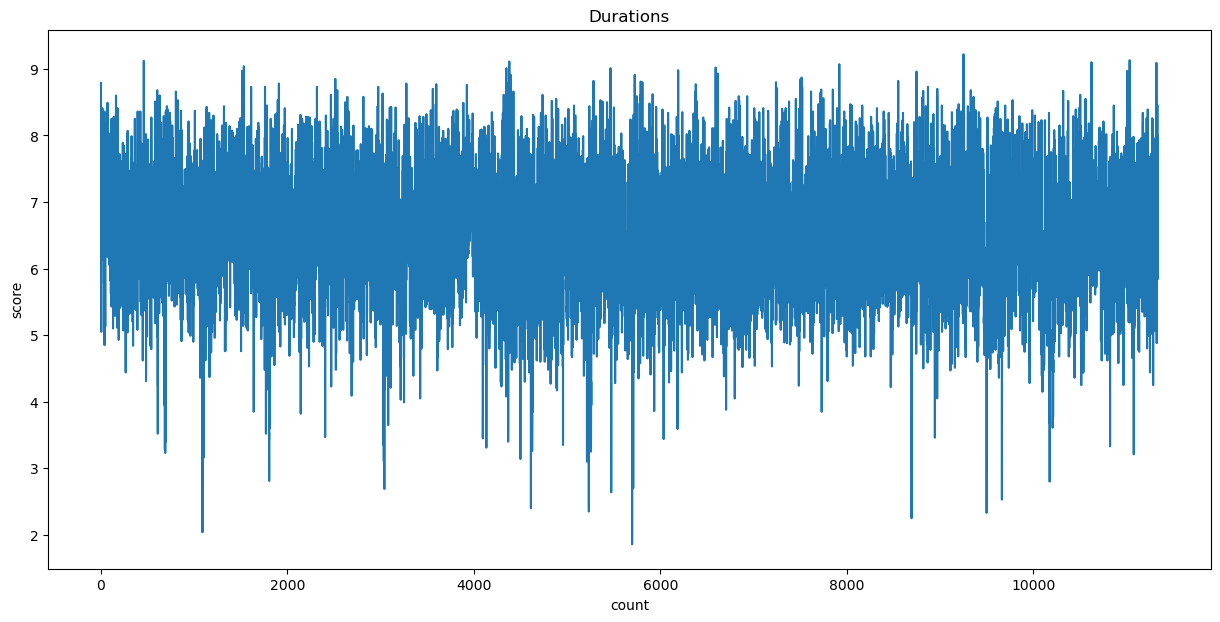

In [8]:
anime['score'].plot(figsize=(15,7))
plt.title('Durations')
plt.xlabel('count')
plt.ylabel('score')
plt.show()


Еще один тип - гистограмма, хорошо показывает распределение

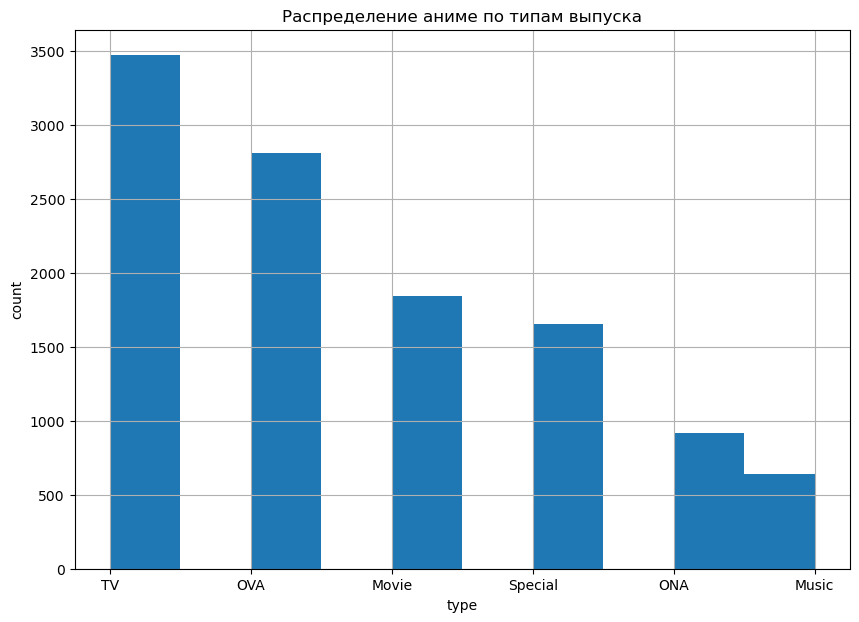

In [9]:
anime['type'].hist(figsize=(10,7))
plt.title('Распределение аниме по типам выпуска')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

<h3> Чаще всего встречает TV и OVA типы, а меньше всего ONA и Music </h3>

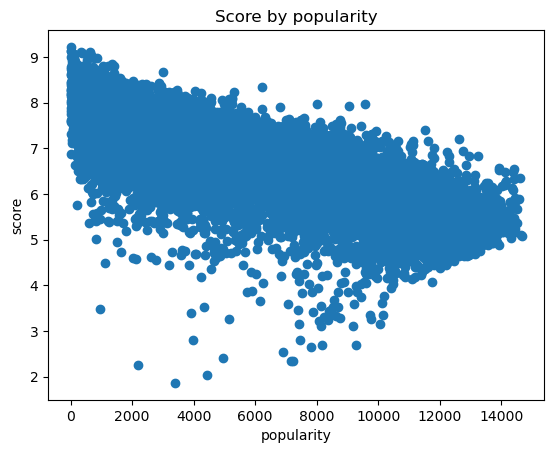

In [10]:
anime = anime.sort_values(by='score')
plt.scatter(anime['popularity'], anime['score'])
plt.title('Score by popularity')
plt.xlabel('popularity')
plt.ylabel('score')
plt.show()

<h3> График показывает, взаимосвязь популярности аниме и его рейтинга, в основном,
 чем популярнее аниме тем выше его рейтинг</h3>

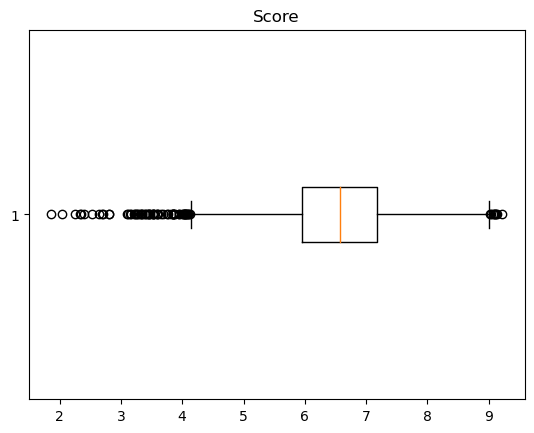

In [11]:
plt.boxplot(anime['score'],  vert=False)
plt.title('Score')
plt.show()

Данный график показывает, что в среднем score у аниме ~6.5, но есть небольшое количество аниме с оценкой >= 9 и довольно большое количество с оценкой
от 3 до 4

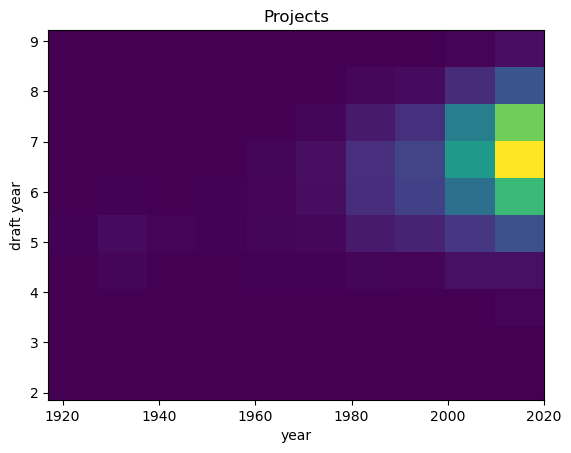

In [12]:
plt.hist2d(anime.aired_from.apply(lambda x : int(x.split('/')[2])),
           anime.score)
plt.title('Projects')
plt.xlabel('year')
plt.ylabel('draft year')
plt.show()

Большинство аниме это выпущенные проекты с 2010 по 2020 год с оценкой 6.5 - 7.5

<h2> Интерполяция кривой </h2>


[0.9454611336237206, 7.485374658222787, 4.638213095552846, 1.4301190376951656, 3.1943816800214577, 4.966033542843471, 3.8869637017493153, 6.53277507647756, 3.535167739208853, 2.0245748207531697]
[2.139007150816894, 4.465481883969508, 3.7881215490731233, 7.571425591613511, 5.919831983246162, 2.7040353770201984, 8.257980378573123, 9.848990993881161, 4.466842124187566, 9.695610925228042]


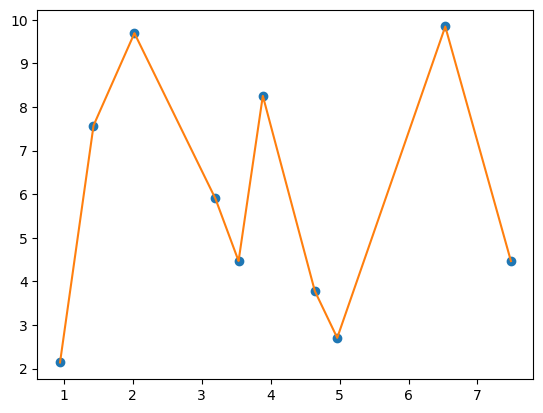

In [13]:
import random
import scipy.interpolate as sc
k = 10

rand_x = [random.random() * 10 for _ in range(k)]
rand_y = [random.random() * 10 for _ in range(k)]

print(rand_x)
print(rand_y)
f = sc.interp1d(rand_x, rand_y, kind='linear')
new_x = np.linspace(min(rand_x), max(rand_x), num=10000, endpoint=True)
plt.plot(rand_x, rand_y, 'o', new_x, f(new_x))

plt.show()

In [14]:
def lagran(x, y, a):
    ans = 0.0
    for i in range(len(y)):
        t = y[i]
        for j in range(len(y)):
            if i != j:
                t *= (a - x[j]) / (x[i] - x[j])
        ans += t
    return ans

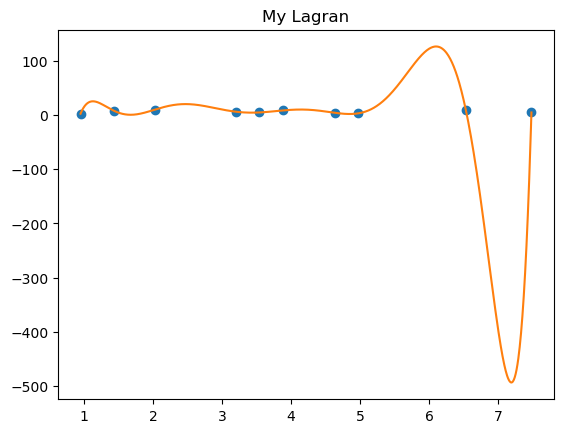

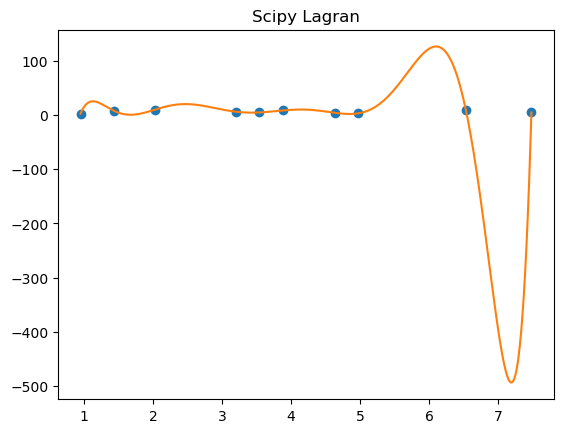

In [15]:
x_new = np.linspace(np.min(rand_x),np.max(rand_x),1000)
y_my = [lagran(rand_x,rand_y,i) for i in x_new]
plt.plot(rand_x,rand_y,'o',x_new,y_my)
plt.title('My Lagran')
plt.show()

f_sc = sc.lagrange(rand_x, rand_y)
plt.plot(rand_x, rand_y, 'o', x_new, f_sc(x_new))
plt.title('Scipy Lagran')
plt.show()

<h2> Быстрая гистограмма </h2>
Построим гистограмму для рандомного набора

(array([2., 1., 1., 1., 1., 2., 2., 2., 0., 3., 1., 2., 0., 0., 3., 0., 0.,
        1., 4., 2., 1., 2., 2., 0., 0., 5., 2., 2., 3., 2., 4., 1., 0., 0.,
        1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 0., 0., 0., 1.]),
 array([10.  , 11.76, 13.52, 15.28, 17.04, 18.8 , 20.56, 22.32, 24.08,
        25.84, 27.6 , 29.36, 31.12, 32.88, 34.64, 36.4 , 38.16, 39.92,
        41.68, 43.44, 45.2 , 46.96, 48.72, 50.48, 52.24, 54.  , 55.76,
        57.52, 59.28, 61.04, 62.8 , 64.56, 66.32, 68.08, 69.84, 71.6 ,
        73.36, 75.12, 76.88, 78.64, 80.4 , 82.16, 83.92, 85.68, 87.44,
        89.2 , 90.96, 92.72, 94.48, 96.24, 98.  ]),
 <BarContainer object of 50 artists>)

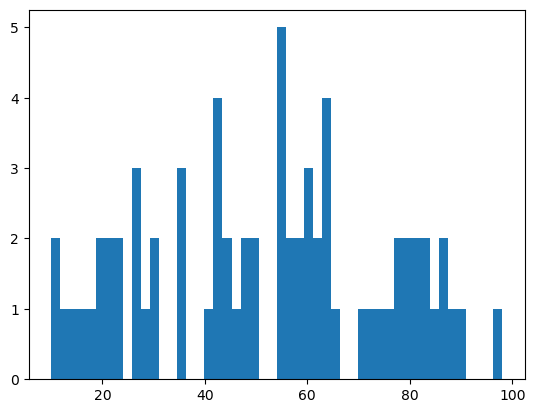

In [16]:
ar = [randint(10, 100) for i in range(randint(30, 100))]
plt.hist(ar, bins=len(set(ar)))

Собственная реализация

In [17]:
from typing import List, Tuple, Union

def fast_hist(array: List[Union[int, float]],
              bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_v = min(array)
    max_v = max(array)
    dif = (max_v - min_v) / bins
    if dif == 0:
        return np.array([len(array)]), np.array([max_v])
    bins_names = np.arange(min_v, max_v, dif)
    bin_count = np.zeros(bins)
    for v in array:
        bin_count[min(int((v - min_v) / dif), bins - 1)] += 1
        #1 2 3 2 4 5 6
    return np.array([int(x) for x in bin_count]), bins_names

Построим гистограмму по этой реализации

<BarContainer object of 50 artists>

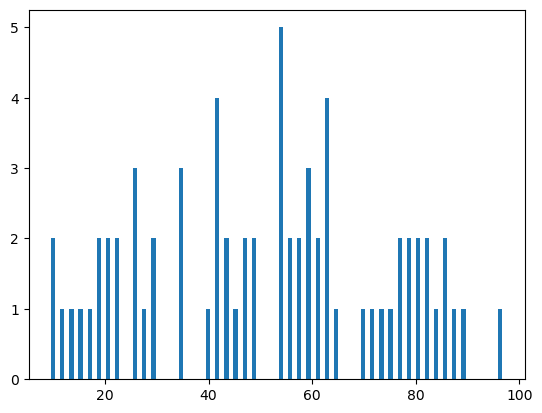

In [18]:
value, bins = fast_hist(ar, len(set(ar)))
plt.bar(bins, value)

45.2 ms ± 8.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
78.6 µs ± 3.59 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


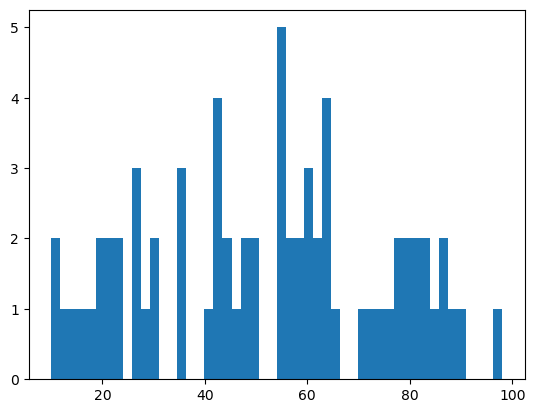

In [19]:
%timeit plt.hist(ar, len(set(ar)))
%timeit fast_hist(ar, len(set(ar)))

Гистограммы идентичны, но библиотечная медленней